In [81]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [82]:
results = np.load('results/SR_param_sweep.npz', allow_pickle = True)
pred_mean = results['pred_mean']
pred_std = results['pred_std']
res_lyap = np.vstack(results['res_lyap'])

In [83]:
sr = np.arange(0.1, 1.4, 0.05)
lyap_sys = 0.9056

## Prediction time vs SR

dr/dr = gamma*(-r+tanh(M.r + Win.u))

We vary the spectral radius of the connectivity matrix M with a constant random seed so each of Win, M, the training time series,...etc is all constant with the only difference being the spectral radius of M.  All reservoirs were tested on the same 200 points randomly selected from the input attractor to find the variation over the attractor.

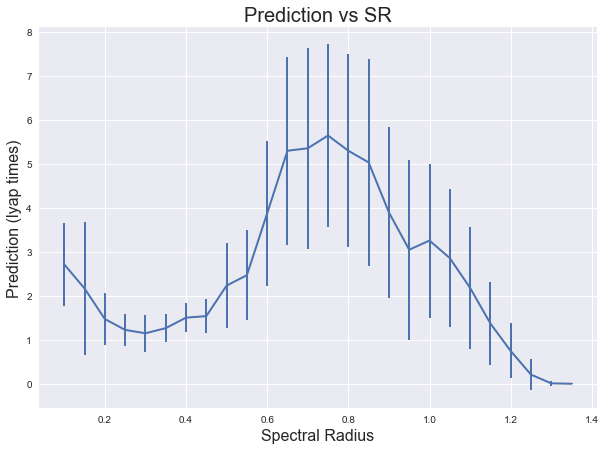

In [84]:
fig = plt.figure(figsize = (10, 7))
plt.errorbar(sr, pred_mean/lyap_sys, yerr = pred_std/lyap_sys, lw = 2)
plt.title('Prediction vs SR', fontsize = 20)
plt.xlabel('Spectral Radius', fontsize = 16)
plt.ylabel('Prediction (lyap times)', fontsize = 16);
fig.savefig('results/SR_slice.pdf', bbox_inches = 'tight')

## Lyapunov Exponents

Plot the full lyapunov spectrum of the predicting reservoir.

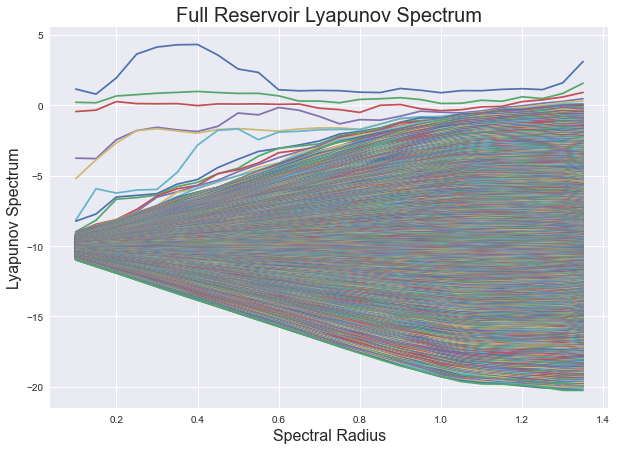

In [41]:
fig = plt.figure(figsize = (10, 7))
for i in range(2000):
    plt.plot(sr, res_lyap[:, i])
    
plt.xlabel('Spectral Radius', fontsize = 16)
plt.ylabel('Lyapunov Spectrum', fontsize = 16)
plt.title('Full Reservoir Lyapunov Spectrum', fontsize = 20);
fig.savefig('results/full_spectrum.pdf', bbox_inches = 'tight')

The first sublot is simply the prediction curve showing how well the reservoir was able to predict forward in time.  The second subplot is the largest lyapunov exponent of the reservoir (solid) and the lorenz system (dashed).  The second subplot is the next few lyapunov exponents of the system (solid) and the second largest exponent of the lorenz system (dashed)  A couple things to note:

The best predictions come when both the largest and second largest reservoir lyapunov exponents are very close to the values of the system. This is as we expect but it is important to note that both have to be close, not just the largest!

The sharp fall off in predictions around SR = 1.2 comes from the third and lower lyapunov exponents of the reservoir crossing 0.  These are the exponents that do not come from the system and completely destroy the ability of the reservoir to predict.

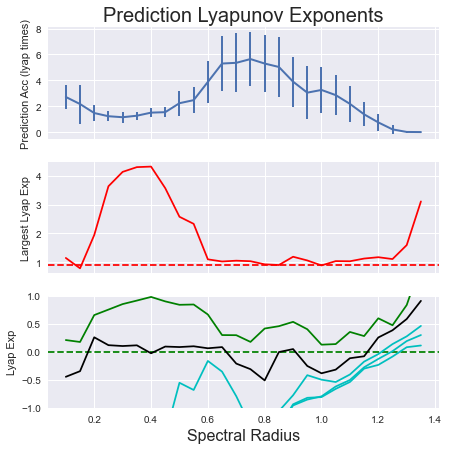

In [85]:
fig, ax = plt.subplots(3,1, sharex = True, figsize = (7, 7))
ax[0].errorbar(sr, pred_mean/lyap_sys, yerr = pred_std/lyap_sys, lw = 2)
ax[1].plot(sr, res_lyap[:, 0], 'r')
ax[1].axhline(0.9056, ls = '--', c = 'r')
ax[2].plot(sr, res_lyap[:, 1], 'g')
ax[2].axhline(0.0, ls = '--', c = 'g')
ax[2].plot(sr, res_lyap[:, 2], 'k')
ax[2].plot(sr, res_lyap[:, 3], 'c')
ax[2].plot(sr, res_lyap[:, 4], 'c')
ax[2].plot(sr, res_lyap[:, 5], 'c')
ax[0].set_title('Prediction Lyapunov Exponents', fontsize = 20)
ax[0].set_ylabel('Prediction Acc (lyap times)')
ax[1].set_ylabel('Largest Lyap Exp')
ax[2].set_ylabel('Lyap Exp')
ax[2].set_xlabel('Spectral Radius', fontsize = 16);
ax[2].set_ylim(-1,1)
fig.savefig('results/pred_lyap_SR_sweep.pdf', bbox_inches = 'tight')

## KY Dimension

Arange the lyapunov exponents from largest to smallest $\lambda_1 \ge \lambda_2 \ge ... \ge \lambda_n$, where n here is the dimension of the system or reservoir.

Let j be the index for which
$$\sum_{i=1}^j \lambda_i \ge 0$$ and $$\sum_{i=1}^{j+1} \lambda_i < 0$$

Thus the lyapunov dimension, D, of the system is
$$D = j+\frac{\sum_{i=1}^j \lambda_i}{|\lambda_{j+1}|}$$

In [86]:
def KY_dim(LE):
    lyap_sum = 0
    for j, l in enumerate(LE):
        temp = lyap_sum+l
        if temp < 0: break
        lyap_sum = temp
    return j+lyap_sum/abs(LE[j])

In [87]:
KY_dim(res_lyap[0])

3.2417875013131616

In [88]:
KY = np.zeros(len(res_lyap))
for i, lyap in enumerate(res_lyap):
    KY[i] = KY_dim(lyap)

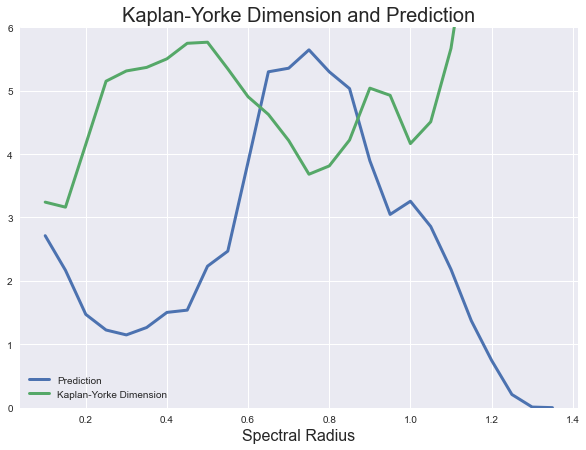

In [91]:
fig = plt.figure(figsize = (10, 7))
plt.plot(sr, pred_mean/lyap_sys, lw = 3, label = 'Prediction')
plt.plot(sr, KY, lw = 3, label = 'Kaplan-Yorke Dimension')
plt.xlabel('Spectral Radius', fontsize = 16)
plt.ylim(0, 6)
plt.legend()
plt.title('Kaplan-Yorke Dimension and Prediction', fontsize = 20);
fig.savefig('results/KY_pred.pdf', bbox_inches = 'tight')